In [20]:
import torch
import os
from src.utils import get_network
from src.prototype_analysis import PrototypeAnalyzer
from src.datasets import load_synthetic_data, load_real_data, AudioMNISTDataset, GTZANDataset, UrbanSound8KDataset

# AUDIO MNIST

In [2]:
device = 'cpu'
model = get_network(model='ConvNet', channel=1, num_classes=10, im_size=(128, 128)).to(device)
analyzer = PrototypeAnalyzer(model, device)

In [3]:
# Load synthetic prototypes
synth_spectrogram, synth_labels = load_synthetic_data(
    'result/res_DM_AUDIO_MNIST_ConvNet_1ipc.pt', 
    device
)
synth_embs = analyzer.get_embeddings(synth_spectrogram)

# Load real data
real_embs, real_labels = load_real_data(
    AudioMNISTDataset,
    os.path.join('data', 'AUDIO_MNIST'),
    'train',
    model,
    device,
    max_samples=10000
)

# Load test data
test_embs, test_labels = load_real_data(
    AudioMNISTDataset,
    os.path.join('data', 'AUDIO_MNIST'),
    'val',
    model,
    device,
    max_samples=5000
)

/Users/isabelurregog/.pyenv/versions/3.8/envs/data-condensation/lib/python3.9/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Processing 0th sample
Processing 1000th sample
Processing 2000th sample
Processing 3000th sample
Processing 4000th sample
Processing 5000th sample
Processing 6000th sample
Processing 7000th sample
Processing 8000th sample
Processing 9000th sample
Processing 0th sample
Processing 1000th sample
Processing 2000th sample
Processing 3000th sample
Processing 4000th sample


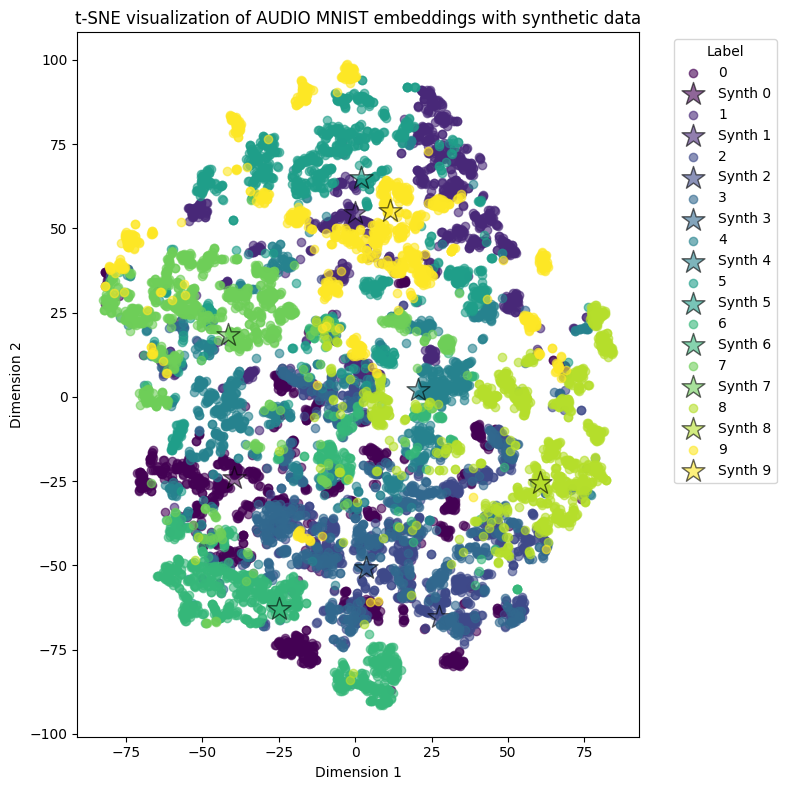

In [4]:
# Visualize embeddings
label_names = [str(i) for i in range(10)]  # Adjust for your dataset
fig, ax = analyzer.plot_embeddings(
    real_embs, 
    real_labels, 
    synth_embs, 
    synth_labels,
    label_names,
    title="t-SNE visualization of AUDIO MNIST embeddings with synthetic data"
)

In [5]:
# Evaluate prototypes
accuracy, f1, pred_labels = analyzer.evaluate_prototypes(
    torch.tensor(synth_embs), 
    synth_labels, 
    test_embs, 
    test_labels
)
print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.60, F1 Score: 0.60


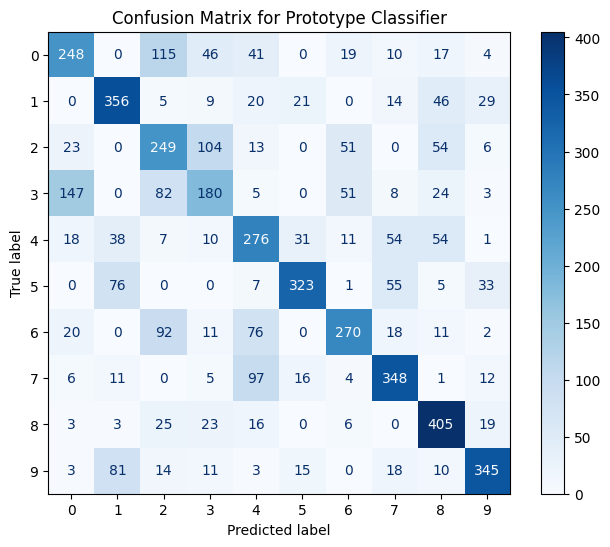

In [6]:
# Plot confusion matrix
analyzer.plot_confusion_matrix(
    test_labels, 
    pred_labels, 
    label_names,
    title="Confusion Matrix for Prototype Classifier"
)

# GTZAN

## 1 IPC

In [7]:
# Load synthetic prototypes
synth_spectrogram, synth_labels = load_synthetic_data(
    'result/res_DM_GTZAN_ConvNet_1ipc.pt', 
    device
)
synth_embs = analyzer.get_embeddings(synth_spectrogram)

In [12]:
# Load real data
real_embs, real_labels = load_real_data(
    GTZANDataset,
    os.path.join('data', 'GTZAN'),
    'train',
    model,
    device,
    max_samples=10000
)

Processing 0th sample
Processing 1000th sample
Processing 2000th sample
Processing 3000th sample
Processing 4000th sample
Processing 5000th sample


In [13]:
# Load test data
test_embs, test_labels = load_real_data(
    GTZANDataset,
    os.path.join('data', 'GTZAN'),
    'val',
    model,
    device,
    max_samples=5000
)

Processing 0th sample
Processing 1000th sample


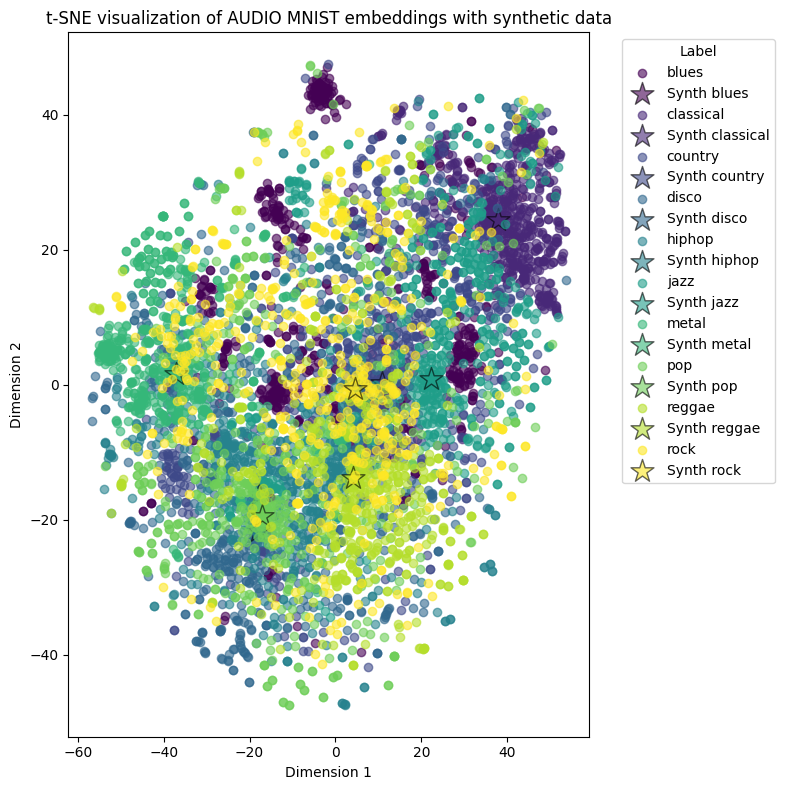

In [14]:
# Visualize embeddings
label_names = ['blues', 'classical', 'country', 'disco','hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']  # Adjust for your dataset
fig, ax = analyzer.plot_embeddings(
    real_embs, 
    real_labels, 
    synth_embs, 
    synth_labels,
    label_names,
    title="t-SNE visualization of AUDIO MNIST embeddings with synthetic data"
)

In [15]:
# Evaluate prototypes
accuracy, f1, pred_labels = analyzer.evaluate_prototypes(
    torch.tensor(synth_embs), 
    synth_labels, 
    test_embs, 
    test_labels
)
print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.37, F1 Score: 0.36


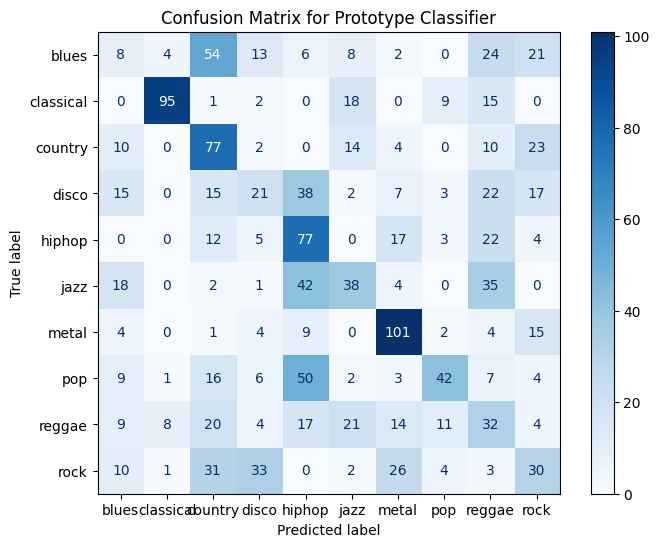

In [16]:
# Plot confusion matrix
analyzer.plot_confusion_matrix(
    test_labels, 
    pred_labels, 
    label_names,
    title="Confusion Matrix for Prototype Classifier"
)

# URBANSOUND8K

In [19]:
# Load synthetic prototypes
synth_spectrogram, synth_labels = load_synthetic_data(
    'result/res_DM_URBANSOUND8K_ConvNet_1ipc.pt', 
    device
)
synth_embs = analyzer.get_embeddings(synth_spectrogram)

In [23]:
# Load real data
real_embs, real_labels = load_real_data(
    UrbanSound8KDataset,
    os.path.join('data', 'URBANSOUND8K'),
    'train',
    model,
    device,
    max_samples=10000
)

Processing 0th sample
Processing 1000th sample
Processing 2000th sample
Processing 3000th sample
Processing 4000th sample
Processing 5000th sample
Processing 6000th sample
Processing 7000th sample


In [24]:
# Load test data
test_embs, test_labels = load_real_data(
    UrbanSound8KDataset,
    os.path.join('data', 'URBANSOUND8K'),
    'val',
    model,
    device,
    max_samples=5000
)

Processing 0th sample
Processing 1000th sample


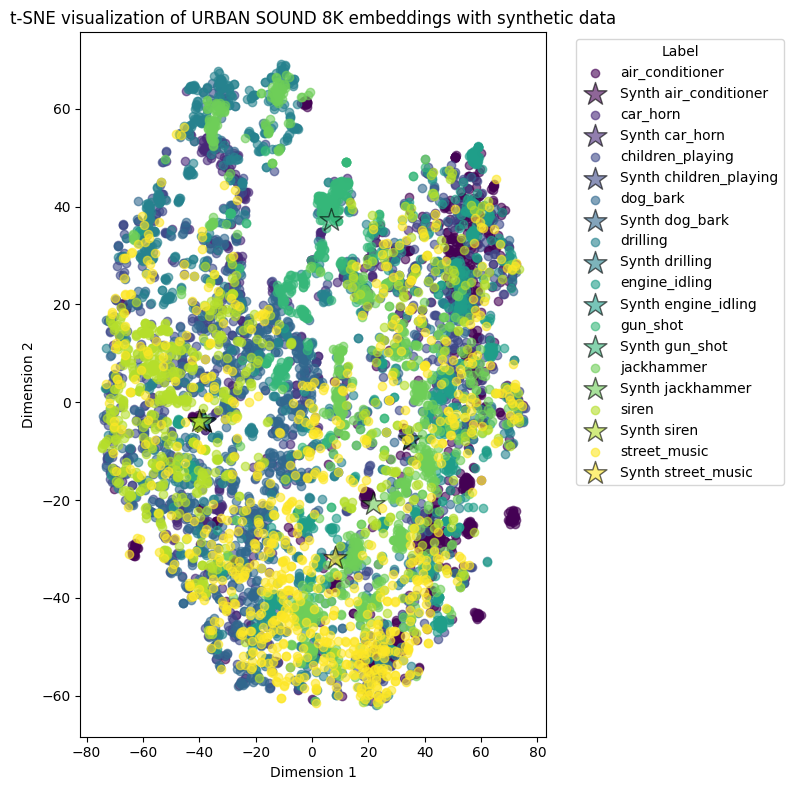

In [25]:
label_names = [ 'air_conditioner', 'car_horn', 'children_playing', 
                'dog_bark', 'drilling', 'engine_idling', 
                'gun_shot', 'jackhammer', 'siren', 'street_music']  # Adjust for your dataset
fig, ax = analyzer.plot_embeddings(
    real_embs, 
    real_labels, 
    synth_embs, 
    synth_labels,
    label_names,
    title="t-SNE visualization of URBAN SOUND 8K embeddings with synthetic data"
)

In [26]:
# Evaluate prototypes
accuracy, f1, pred_labels = analyzer.evaluate_prototypes(
    torch.tensor(synth_embs), 
    synth_labels, 
    test_embs, 
    test_labels
)
print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.32, F1 Score: 0.29


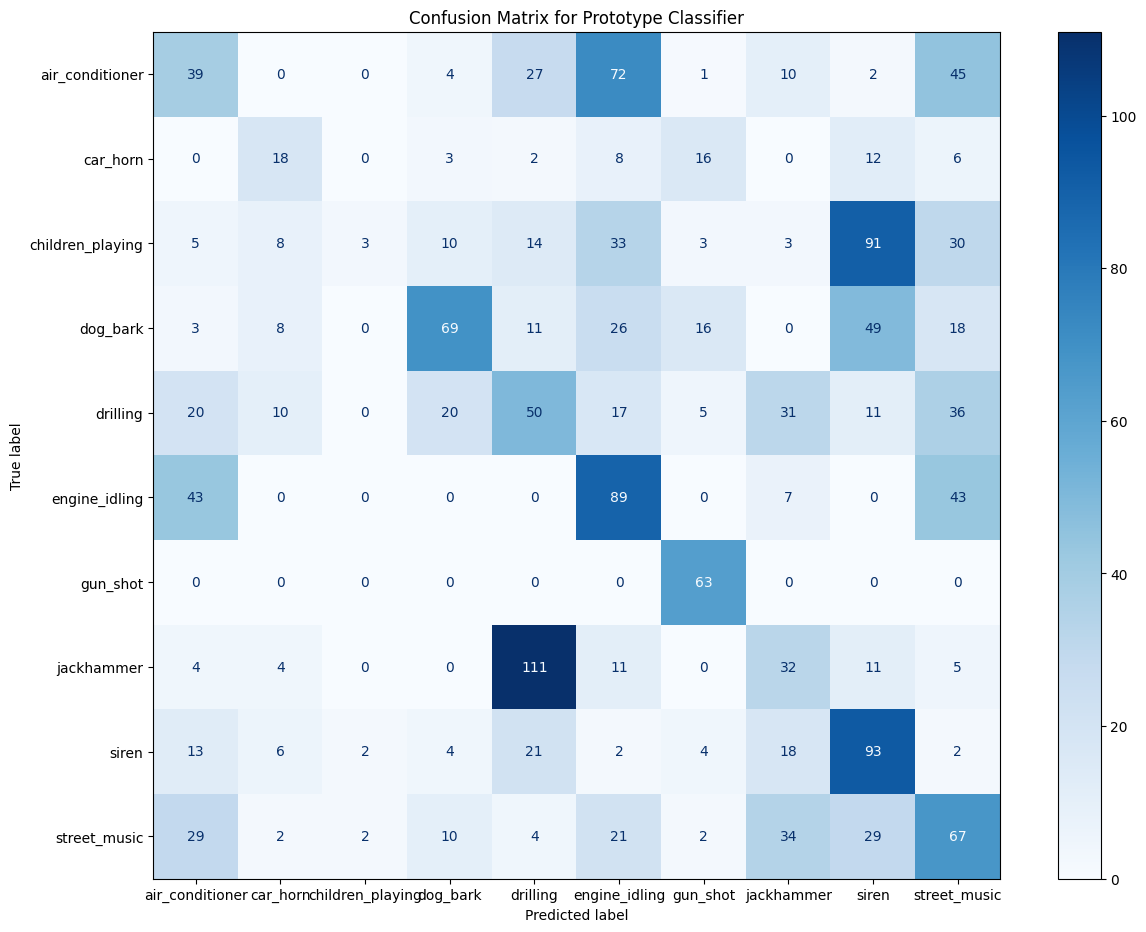

In [30]:
# Plot confusion matrix
analyzer.plot_confusion_matrix(
    test_labels, 
    pred_labels, 
    label_names,
    title="Confusion Matrix for Prototype Classifier",
    figsize=(15, 11)
)